In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ev_pop_df = gpd.read_file('C:/Users/nainy/Documents/nss_dda16/python/projects/EV_Capstone_project_nainy/data/Electric_Vehicle_Population_Data.csv')


In [4]:
ev_pop_df.shape

(257635, 18)

In [5]:

ev_pop_df.head( )

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,geometry
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,15,347724772,POINT (-120.50729 46.60464),PACIFICORP,53077001502,None
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,35,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,53035092901,None
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,32,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,53061051402,None
3,5UXKT0C37H,King,Auburn,WA,98001,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,30,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029806,None
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,53057952304,None


In [6]:
ev_pop_df.isna().sum()

VIN (1-10)                                                0
County                                                    0
City                                                      0
State                                                     0
Postal Code                                               0
Model Year                                                0
Make                                                      0
Model                                                     0
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                            0
Base MSRP                                                 0
Legislative District                                      0
DOL Vehicle ID                                            0
Vehicle Location                                          0
Electric Utility                                          0
2020 Census Tract                       

In [7]:
ev_pop_df["Vehicle Location"].isna().sum()

0

In [9]:
from shapely import wkt

def safe_wkt(val):
    try:
        if pd.isna(val) or val.strip() == "":
            return None
        return wkt.loads(val)
    except Exception:
        return None

# Apply safe parser
ev_pop_df["geometry"] = ev_pop_df["Vehicle Location"].apply(safe_wkt)

# Drop rows where geometry is None
gdf = gpd.GeoDataFrame(ev_pop_df, geometry="geometry", crs="EPSG:4326").dropna(subset=["geometry"])


In [10]:
gdf.shape

(257619, 18)

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#ev_pop_df.crs =

In [11]:
ev_pop_df.head(4)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,geometry
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,15,347724772,POINT (-120.50729 46.60464),PACIFICORP,53077001502,POINT (-120.50729 46.60464)
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,35,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,53035092901,POINT (-122.68471 47.50524)
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,32,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,53061051402,POINT (-122.29245 47.82557)
3,5UXKT0C37H,King,Auburn,WA,98001,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,30,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029806,POINT (-122.23035 47.30740)


In [ ]:
ev_pop_df.info()

In [14]:
type(ev_pop_df)

geopandas.geodataframe.GeoDataFrame

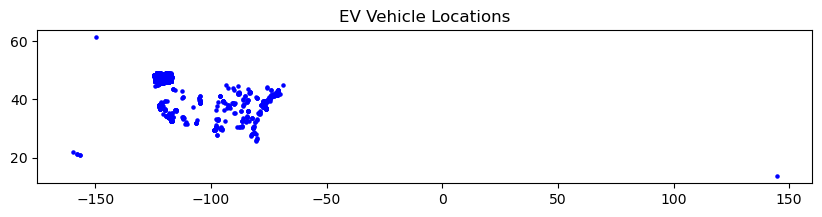

In [15]:
# Assume gdf is your GeoDataFrame
gdf.plot(markersize=5, color="blue", figsize=(10,6))
plt.title("EV Vehicle Locations")
plt.show()

In [ ]:
# Load a world basemap (or US states)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Filter to USA
usa = world[world["name"] == "United States of America"]

# Plot
fig, ax = plt.subplots(figsize=(10,10))
usa.plot(ax=ax, color="lightgray", edgecolor="black")
gdf.plot(ax=ax, markersize=5, color="red", alpha=0.6)
plt.title("EV Vehicle Locations Across USA")
plt.show()

In [ ]:
#DATA SET FOR US STATES
#https://catalog.data.gov/dataset/tiger-line-shapefile-current-nation-u-s-state-and-equivalent-entities

In [17]:
US_states = gpd.read_file("C:/Users/nainy/Documents/nss_dda16/python/geospatial-nainyb/data/tl_2024_us_state/tl_2024_us_state.shp")

In [18]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
US_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [43]:
merged = gpd.sjoin(US_states,gdf,how="left", predicate="contains")


In [44]:
merged.shape

(257629, 34)

In [45]:
US_states.crs =gdf.crs

In [46]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
US_states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#US_states.plot()
fig, ax = plt.subplots(figsize=(16,16))
merged.plot(ax = ax);
ax.axis('off');

In [ ]:
print(merged.loc[0, 'geometry'])

In [ ]:
merged.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
merged.plot(column = 'VIN (1-10)', 
              ax = ax)
ax.axis('off');

In [ ]:
merged.info()

In [ ]:
zipcode_us_states = gpd.read_file("C:/Users/nainy/Documents/nss_dda16/python/projects/EV_Capstone_project_nainy/cb_2019_us_zcta510_500k/cb_2019_us_zcta510_500k.shp")

In [ ]:
ev_pop_df.crs= zipcode_us_states.crs

In [ ]:
merged_2 = gpd.sjoin(zipcode_us_states, ev_pop_df,  how="left", predicate="contains")

In [ ]:
merged_2.head(3)

In [ ]:
merged_2.plot()


In [ ]:
zipcode_us_states.head(3)

In [ ]:
zipcode_us_states.info()

In [ ]:
zipcode_us_states.loc[0, 'geometry']

In [ ]:
type(zipcode_us_states)

In [ ]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcode_us_states.plot(column = 'ZCTA5CE10', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [ ]:
merged_2 = gpd.sjoin(gdf, zipcode_us_states, how="left", predicate="intersects")

In [ ]:
type(merged_2)

In [ ]:
len(merged_2)

In [ ]:
merged_2.head(3)

In [ ]:
merged_2['Postal Code'].value_counts().sort_values(ascending = False)

In [ ]:
Highest= merged_2.loc[merged_2['Postal Code']== '98052'    ]

In [ ]:
Highest.shape

In [ ]:
type(Highest)

ax = Highest.plot(figsize = (8, 10), color = 'lightgreen', edgecolor = 'black')
Highest.plot( ax = ax, column = 'geometry', legend = True,);
plt.show();

In [ ]:
Short_Term_Rental_Permits_geo_join = gpd.sjoin(Short_Term_Rental_Permits_geo, zipcodes, predicate = 'within')

In [ ]:
# reverse the order when constructing the array for folium location
area_center = [geometry.y, geometry.x]

# check the order of area_center, the location for our folium map
print(area_center)

In [ ]:
import folium

# Calculate average lat/lon
avg_lat = merged['geometry'].apply(lambda p: p.y).mean()
avg_lon = merged['geometry'].apply(lambda p: p.x).mean()

m = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)


In [ ]:
for _, row in merged.iterrows():
    popup = folium.Popup(f"""
        <b>VIN:</b> {row['VIN (1-10)']}<br>
        <b>Make:</b> {row['Make']}<br>
        <b>Model:</b> {row['Model']}<br>
        <b>Year:</b> {row['Model Year']}<br>
        <b>Type:</b> {row['Electric Vehicle Type']}<br>
        <b>Range:</b> {row['Electric Range']} miles<br>
        <b>MSRP:</b> ${row['Base MSRP']}
    """, max_width=300)

    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=popup,
        icon=folium.Icon(color='green', icon='car', prefix='fa')
    ).add_to(m)


In [ ]:
m.save("ev_map.html")


In [ ]:
import webbrowser
webbrowser.open("ev_map.html")


In [ ]:
# Preview the data
print(states.head())

In [ ]:


# Plot it
states.plot(figsize=(10, 10), color="lightgrey", edgecolor="black")
plt.title("U.S. State Boundaries")
plt.axis("off")
plt.show()